# Reading the Dataset

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [52]:
data = pd.read_csv('salaries.csv')

In [53]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S
1,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L
2,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S
3,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L
4,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M


In [54]:
data.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1190,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
1191,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
1192,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
1193,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
1194,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


# Data Pre-processing

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1195 non-null   int64 
 1   experience_level    1195 non-null   object
 2   employment_type     1195 non-null   object
 3   job_title           1195 non-null   object
 4   salary              1195 non-null   int64 
 5   salary_currency     1195 non-null   object
 6   salary_in_usd       1195 non-null   int64 
 7   employee_residence  1195 non-null   object
 8   remote_ratio        1195 non-null   int64 
 9   company_location    1195 non-null   object
 10  company_size        1195 non-null   object
dtypes: int64(4), object(7)
memory usage: 102.8+ KB


In [56]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1195.000000,1.195000e+03,1195.000000,1195.000000
mean,2021.684519,2.495210e+05,122041.142259,66.736402
std,0.584604,1.136720e+06,66487.800833,44.035085
min,2020.000000,2.324000e+03,2324.000000,0.000000
25%,2021.000000,8.000000e+04,73961.000000,0.000000
50%,2022.000000,1.300000e+05,120000.000000,100.000000
75%,2022.000000,1.755500e+05,160237.500000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


In [57]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [58]:
#data.experience_level=data.experience_level.map({'EN':1,'MI':2,'SE':3,'EX':4})
#data.employment_type = data.employment_type.map({'PT':1,'FT':2,'CT':3,'FL':4})
#data.company_size = data.company_size.map({'S':1,'M':2,'L':3})

In [59]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S
1,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L
2,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S
3,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L
4,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M


# Data Visualization

In [60]:
features_cat = ['work_year', 'experience_level', 'employment_type', 'job_title',
                'employee_residence', 'company_location', 'company_size']

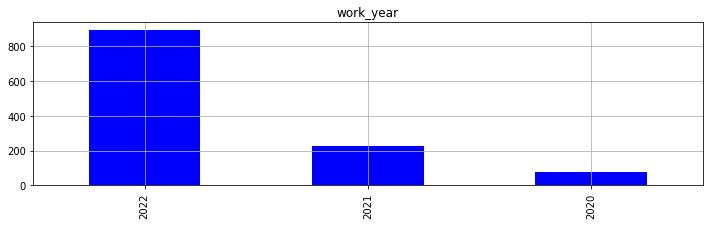

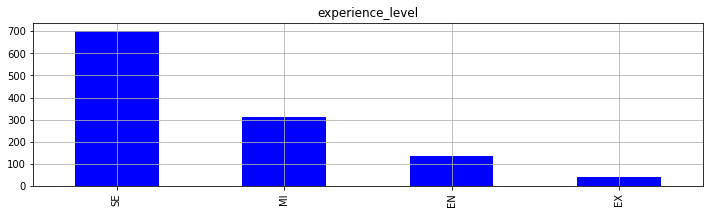

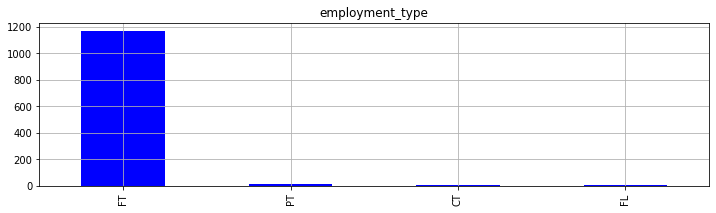

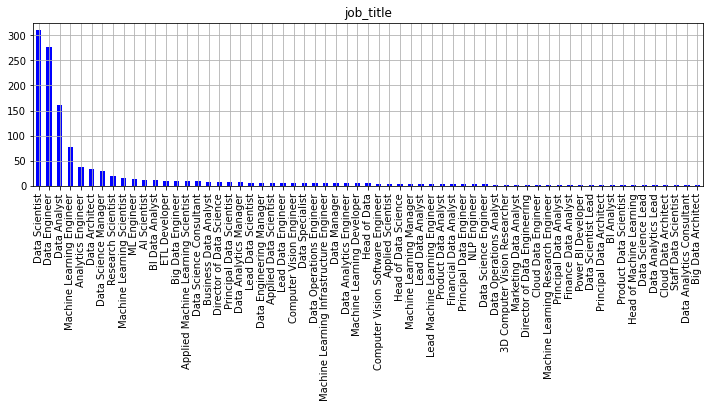

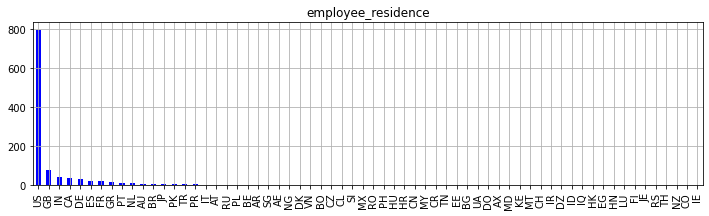

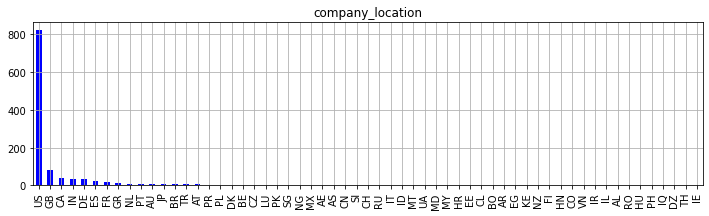

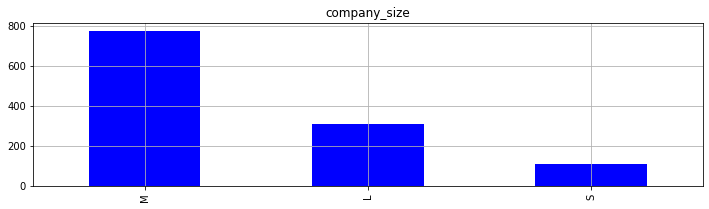

In [61]:
for f in features_cat:
    plt.figure(figsize=(12,3))
    data[f].value_counts().plot(kind='bar', color='blue')
    plt.title(f)
    plt.grid()
    plt.show()

In [62]:
# select subset
df_select = data[(data.work_year==2022) & 
               (data.employment_type=='FT') & 
               (data.company_location=='US')]

print('Size of selection:', df_select.shape)

# adjust relevant features
features_cat_select = ['experience_level', 'job_title',
                       'employee_residence', 'company_size']

Size of selection: (690, 11)


In [63]:
# a few people in our selection work from abroad (employee_residence != US)
df_select.employee_residence.value_counts()

US    680
BO      2
CR      1
RU      1
AR      1
MY      1
CL      1
BR      1
IN      1
ES      1
Name: employee_residence, dtype: int64

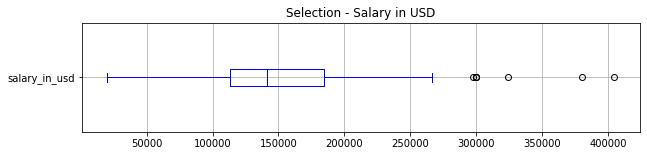

In [64]:
plt.figure(figsize=(10,2))
df_select.salary_in_usd.plot(kind='box', vert=False, color='blue')
plt.title('Selection - Salary in USD')
plt.grid()
plt.show()

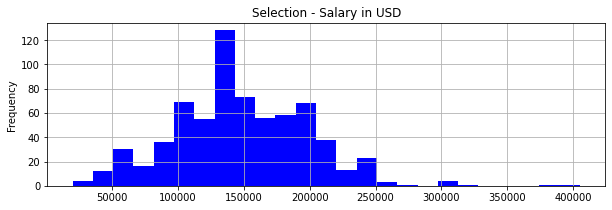

In [65]:
# plot distribution of salary (in USD)
plt.figure(figsize=(10,3))
df_select.salary_in_usd.plot(kind='hist', bins=25, color='blue')
plt.title('Selection - Salary in USD')
plt.grid()
plt.show()

<AxesSubplot:>

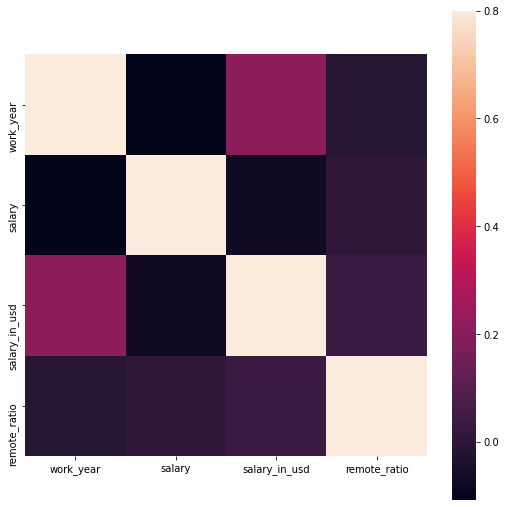

In [66]:
%matplotlib inline 
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

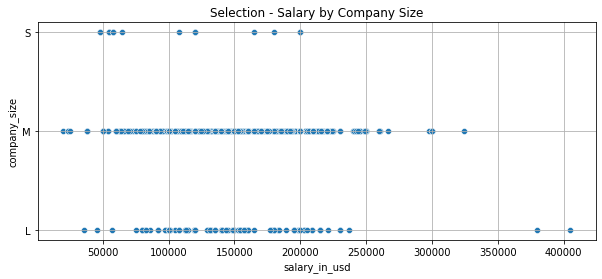

In [67]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df_select, y='company_size', x='salary_in_usd')
plt.title('Selection - Salary by Company Size')
plt.grid()
plt.show()

In [68]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S
1,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L
2,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S
3,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L
4,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M


In [69]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1195 non-null   int64 
 1   experience_level    1195 non-null   object
 2   employment_type     1195 non-null   object
 3   job_title           1195 non-null   object
 4   salary              1195 non-null   int64 
 5   salary_currency     1195 non-null   object
 6   salary_in_usd       1195 non-null   int64 
 7   employee_residence  1195 non-null   object
 8   remote_ratio        1195 non-null   int64 
 9   company_location    1195 non-null   object
 10  company_size        1195 non-null   object
dtypes: int64(4), object(7)
memory usage: 102.8+ KB


In [71]:
data = data.drop(["salary"], axis=1)
data = data.drop(["salary_currency"], axis=1)
data = data.drop(["job_title"], axis=1)
data.head()

,work_year,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,200000,GB,100,GB,S
1,2022,EN,FT,74378,CA,100,CA,L
2,2022,SE,FT,165000,US,50,US,S
3,2022,EN,FT,33599,GB,50,GB,L
4,2022,SE,FT,185900,US,0,US,M


In [72]:
data = data.drop(["company_location"],axis=1)

In [73]:
data.head()

,work_year,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_size
0,2022,SE,FT,200000,GB,100,S
1,2022,EN,FT,74378,CA,100,L
2,2022,SE,FT,165000,US,50,S
3,2022,EN,FT,33599,GB,50,L
4,2022,SE,FT,185900,US,0,M


# Encoding Values

In [74]:
data.experience_level=data.experience_level.map({'EN':1,'MI':2,'SE':3,'EX':4})
data.employment_type = data.employment_type.map({'PT':1,'FT':2,'CT':3,'FL':4})
data.company_size = data.company_size.map({'S':1,'M':2,'L':3})

# Splitting the dataset

In [75]:
data.corr()

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size
work_year,1.000000,0.322690,-0.000839,0.213543,-0.012700,-0.093555
experience_level,0.322690,1.000000,0.060309,0.519460,0.030519,-0.026940
employment_type,-0.000839,0.060309,1.000000,0.023065,0.020747,-0.016056
salary_in_usd,0.213543,0.519460,0.023065,1.000000,0.032861,0.077035
remote_ratio,-0.012700,0.030519,0.020747,0.032861,1.000000,0.008992
company_size,-0.093555,-0.026940,-0.016056,0.077035,0.008992,1.000000


In [76]:
y = data.iloc[:,4]
X1 = data.iloc[:,0:4]
X2 = data.iloc[:,5:]

X = X1.join(X2)

In [77]:
X

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size
0,2022,3,2,200000,100,1
1,2022,1,2,74378,100,3
2,2022,3,2,165000,50,1
3,2022,1,2,33599,50,3
4,2022,3,2,185900,0,2
...,...,...,...,...,...,...
1190,2020,3,2,412000,100,3
1191,2021,2,2,151000,100,3
1192,2020,1,2,105000,100,1
1193,2020,1,3,100000,100,3


In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   work_year         1195 non-null   int64
 1   experience_level  1195 non-null   int64
 2   employment_type   1195 non-null   int64
 3   salary_in_usd     1195 non-null   int64
 4   remote_ratio      1195 non-null   int64
 5   company_size      1195 non-null   int64
dtypes: int64(6)
memory usage: 56.1 KB


In [79]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [80]:
X_train.shape

(836, 6)

In [81]:
X_test.shape

(359, 6)

# Model Implementation

1. Logistic Regression 

In [82]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\simra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
y_pred = logreg.predict(X_test)
y_pred

array(['US', 'US', 'US', 'US', 'US', 'US', 'US', 'IN', 'IN', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'IN', 'US', 'US', 'US', 'US', 'IN',
       'US', 'IN', 'US', 'IN', 'US', 'US', 'US', 'US', 'US', 'IN', 'US',
       'US', 'US', 'US', 'US', 'US', 'IN', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'IN', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'IN', 'IN', 'US', 'US', 'IN', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'IN', 'US', 'US', 'US',
       'US', 'US', 'IN', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'U

In [84]:
print(logreg.score(X_test,y_pred))

1.0


In [85]:
conf = confusion_matrix(y_test,y_pred)
conf

array([[  0,   0,   0, ...,   0,   3,   0],
       [  0,   0,   0, ...,   0,   2,   0],
       [  0,   0,   0, ...,   0,   5,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0, 240,   0],
       [  0,   0,   0, ...,   0,   1,   0]], dtype=int64)

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          AE       0.00      0.00      0.00         3
          AT       0.00      0.00      0.00         2
          AU       0.00      0.00      0.00         5
          BE       0.00      0.00      0.00         3
          BO       0.00      0.00      0.00         3
          BR       0.00      0.00      0.00         4
          CA       0.00      0.00      0.00        10
          DE       0.00      0.00      0.00         6
          EG       0.00      0.00      0.00         1
          ES       0.00      0.00      0.00         6
          FR       0.00      0.00      0.00         2
          GB       0.00      0.00      0.00        34
          GR       0.00      0.00      0.00         3
          HN       0.00      0.00      0.00         1
          HU       0.00      0.00      0.00         1
          ID       0.00      0.00      0.00         1
          IE       0.00      0.00      0.00         1
          IN       0.29    

C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. Support Vector Machine (SVM)

In [87]:
from sklearn.svm import SVC

linear_svc = SVC(kernel='rbf', C=1000.0, probability=True, gamma='scale')
linear_svc.fit(X_train.values, np.ravel(y_train))

SVC(C=1000.0, probability=True)

In [88]:
y_svc  = linear_svc.predict(X_test)
y_svc

C:\Users\simra\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array(['US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'IN', 'US', 'US', 'US', 'US', 'IN',
       'US', 'IN', 'US', 'IN', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'IN', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'IN', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'IN', 'IN', 'US', 'US', 'IN', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'IN', 'US', 'US', 'US',
       'US', 'US', 'IN', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'U

In [89]:
print(confusion_matrix(y_test,y_svc))

[[  0   0   0 ...   0   3   0]
 [  0   0   0 ...   0   2   0]
 [  0   0   0 ...   0   5   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 241   0]
 [  0   0   0 ...   0   1   0]]


In [90]:
print(classification_report(y_test,y_svc))

              precision    recall  f1-score   support

          AE       0.00      0.00      0.00         3
          AT       0.00      0.00      0.00         2
          AU       0.00      0.00      0.00         5
          BE       0.00      0.00      0.00         3
          BO       0.00      0.00      0.00         3
          BR       0.00      0.00      0.00         4
          CA       0.00      0.00      0.00        10
          DE       0.00      0.00      0.00         6
          EG       0.00      0.00      0.00         1
          ES       0.00      0.00      0.00         6
          FR       0.00      0.00      0.00         2
          GB       0.00      0.00      0.00        34
          GR       0.00      0.00      0.00         3
          HN       0.00      0.00      0.00         1
          HU       0.00      0.00      0.00         1
          ID       0.00      0.00      0.00         1
          IE       0.00      0.00      0.00         1
          IN       0.36    

C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=300,  criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0
                                  , bootstrap=True,oob_score=False, n_jobs=1, random_state=None,
                                  verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=300,
                       n_jobs=1)

In [92]:
y_rf = classifier.predict(X_test)
y_rf

array(['US', 'US', 'GB', 'US', 'US', 'US', 'GB', 'JP', 'ES', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'GB', 'US', 'US', 'US', 'CA',
       'US', 'GB', 'US', 'US', 'US', 'IN', 'US', 'US', 'US', 'US', 'CA',
       'US', 'IN', 'US', 'GB', 'US', 'GB', 'US', 'US', 'US', 'SI', 'US',
       'US', 'US', 'GB', 'US', 'US', 'UA', 'US', 'US', 'US', 'US', 'CA',
       'US', 'US', 'IN', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'AR', 'US', 'US', 'GB', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'FR', 'US', 'US', 'US', 'US', 'GB',
       'US', 'PK', 'US', 'US', 'US', 'US', 'GB', 'US', 'US', 'US', 'US',
       'IN', 'SI', 'GR', 'US', 'FR', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'UA', 'US', 'US', 'US',
       'US', 'US', 'IN', 'US', 'US', 'US', 'US', 'US', 'US', 'IT', 'US',
       'DE', 'US', 'US', 'US', 'US', 'CA', 'US', 'E

In [93]:
print(confusion_matrix(y_test,y_rf))

[[  0   0   0 ...   0   3   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   1   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   1   0 ...   0 232   0]
 [  0   0   0 ...   0   0   0]]


In [94]:
print(classification_report(y_test,y_rf))

              precision    recall  f1-score   support

          AE       0.00      0.00      0.00         3
          AR       0.00      0.00      0.00         0
          AT       0.00      0.00      0.00         2
          AU       0.00      0.00      0.00         5
          AX       0.00      0.00      0.00         0
          BE       0.00      0.00      0.00         3
          BO       0.00      0.00      0.00         3
          BR       0.00      0.00      0.00         4
          CA       0.20      0.10      0.13        10
          CO       0.00      0.00      0.00         0
          CZ       0.00      0.00      0.00         0
          DE       0.25      0.17      0.20         6
          EG       0.00      0.00      0.00         1
          ES       0.40      0.33      0.36         6
          FR       0.00      0.00      0.00         2
          GB       0.42      0.24      0.30        34
          GR       0.00      0.00      0.00         3
          HN       0.00    

C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_cla

4. Perceptron Learning

In [95]:
from sklearn.linear_model import Perceptron

model1=Perceptron(eta0=1.0,max_iter=1000,tol=1e-3,random_state=42)
model1.fit(X_train, y_train)

Perceptron(random_state=42)

In [96]:
y_per = model1.predict(X_test)
y_per

array(['US', 'US', 'US', 'US', 'US', 'US', 'RU', 'RU', 'RU', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'RU',
       'US', 'US', 'US', 'US', 'RU', 'RU', 'US', 'US', 'US', 'US', 'RU',
       'US', 'RU', 'US', 'RU', 'US', 'US', 'US', 'US', 'US', 'RU', 'US',
       'US', 'US', 'US', 'US', 'US', 'RU', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'RU', 'US', 'RU', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'RU', 'US', 'US', 'US', 'US', 'RU',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'IN', 'RU', 'RU', 'US', 'RU', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'RU', 'US', 'US', 'US',
       'US', 'US', 'RU', 'US', 'US', 'US', 'US', 'US', 'US', 'RU', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'R

In [97]:
print(confusion_matrix(y_test,y_per))

[[  0   0   0 ...   0   3   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   3   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 235   0]
 [  0   0   0 ...   0   0   0]]


In [98]:
print(classification_report(y_test,y_per))

C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          AE       0.00      0.00      0.00         3
          AT       0.00      0.00      0.00         2
          AU       0.00      0.00      0.00         5
          BE       0.00      0.00      0.00         3
          BO       0.00      0.00      0.00         3
          BR       0.00      0.00      0.00         4
          CA       0.00      0.00      0.00        10
          DE       0.00      0.00      0.00         6
          EG       0.00      0.00      0.00         1
          ES       0.00      0.00      0.00         6
          FR       0.00      0.00      0.00         2
          GB       0.00      0.00      0.00        34
          GR       0.00      0.00      0.00         3
          HN       0.00      0.00      0.00         1
          HU       0.00      0.00      0.00         1
          ID       0.00      0.00      0.00         1
          IE       0.00      0.00      0.00         1
          IN       1.00    

C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_cla

5. Multilayer Perceptron

In [99]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [100]:
y_mlp = mlp.predict(X_test)
print(classification_report(y_test, y_mlp))

              precision    recall  f1-score   support

          AE       0.00      0.00      0.00         3
          AT       0.00      0.00      0.00         2
          AU       0.00      0.00      0.00         5
          BE       0.00      0.00      0.00         3
          BO       0.00      0.00      0.00         3
          BR       0.00      0.00      0.00         4
          CA       0.00      0.00      0.00        10
          DE       0.00      0.00      0.00         6
          EG       0.00      0.00      0.00         1
          ES       0.00      0.00      0.00         6
          FR       0.00      0.00      0.00         2
          GB       0.00      0.00      0.00        34
          GR       0.00      0.00      0.00         3
          HN       0.00      0.00      0.00         1
          HU       0.00      0.00      0.00         1
          ID       0.00      0.00      0.00         1
          IE       0.00      0.00      0.00         1
          IN       0.29    

C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_cla

6. CatBoost

In [103]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(X_train, y_train,  
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [104]:
y_cb = clf.predict(X_test)
print(classification_report(y_test, y_cb))

              precision    recall  f1-score   support

          AE       0.00      0.00      0.00         3
          AT       0.00      0.00      0.00         2
          AU       0.00      0.00      0.00         5
          BE       0.00      0.00      0.00         3
          BO       0.00      0.00      0.00         3
          BR       0.00      0.00      0.00         4
          CA       0.00      0.00      0.00        10
          DE       0.00      0.00      0.00         6
          EG       0.00      0.00      0.00         1
          ES       0.00      0.00      0.00         6
          FR       0.00      0.00      0.00         2
          GB       0.42      0.15      0.22        34
          GR       0.00      0.00      0.00         3
          HN       0.00      0.00      0.00         1
          HU       0.00      0.00      0.00         1
          ID       0.00      0.00      0.00         1
          IE       0.00      0.00      0.00         1
          IN       0.33    

C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
